In [1]:
!pip install scikit-learn==1.3.2 --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 9.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')


In [4]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [5]:
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)


In [6]:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=5, random_state=42, n_init=10))
])

In [7]:
pipeline.fit(X_train)
train_labels = pipeline.predict(X_train)
test_labels = pipeline.predict(X_test)

In [8]:
silhouette = silhouette_score(X_test, test_labels)
calinski = calinski_harabasz_score(X_test, test_labels)
davies = davies_bouldin_score(X_test, test_labels)

In [9]:
print("Silhouette Score:", round(silhouette, 3))
print("Calinski-Harabasz Index:", round(calinski, 3))
print("Davies-Bouldin Index:", round(davies, 3))

Silhouette Score: 0.554
Calinski-Harabasz Index: 74.77
Davies-Bouldin Index: 0.565


In [10]:
X_scaled = pipeline.named_steps['scaler'].transform(X)
labels = pipeline.named_steps['kmeans'].predict(X_scaled)
centers = pipeline.named_steps['scaler'].inverse_transform(pipeline.named_steps['kmeans'].cluster_centers_)


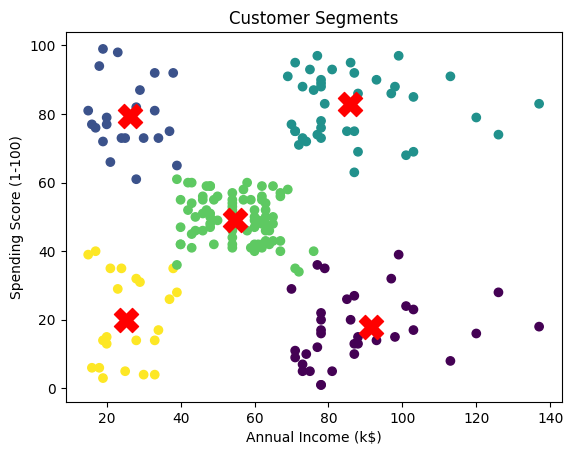

In [11]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=labels, cmap='viridis')
plt.scatter(centers[:,0], centers[:,1], s=300, c='red', marker='X')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.show()